---

**<font color="green">Reviewer's comment V3</font>**

Gaini, hi!

You've worked hard and now your project is perfect!


---



---

**<font color="green">Reviewer's comment V2</font>**

Gaini, hello!

I really appreciate the corrections you sent! 


---


---

**<font color="green">Reviewer's comment</font>**

Hi, Gaini! You've done a really good job!

Sorry for review delay

My name is Yuliy, I'll review your project.

In the notebook you'll meet my comments in markdown cells with "Reviewer's comment" title.

Please don't delete my comments. Great if you choose 

---
<div class="alert alert-block alert-info">
    

### Comment

Your comment text
</div>
    
---


for your comments - It's easier for us to follow the corrections.

---

My comments look like:

<div class="alert alert-block alert-danger">
    

### Reviewer's comment

This comment is required corrections - I can't accept project without it
</div>
    
---

<div class="alert alert-block alert-warning">
    

### Reviewer's comment

This comment correction is up to you - It is recommendation or advice for future
    
</div>

---

<div class="alert alert-block alert-success">
    

### Reviewer's comment

This comment indicates right and quality decision =)

</div>

---


## Final project: A/B test

##### Goal: Conduct an A/B test and check the statistical significance of conversion rates' difference at each funnel stage for A/B groups using z-test. 

Plan:

Step 1. Preprocessing. Find and replace missing values, drop duplicates, change datatypes where needed.\
Step 2. EDA. Answer the questions and make conclusions:
    1. Study conversion at different stages of the funnel.
    2. Is the number of events per user distributed equally among the samples?
    3. Are there users who are present in both samples?
    4. How is the number of events distributed among days?
    5. Are there any peculiarities in the data that you have to take into account before starting the A/B test?
    6. Step 2 conclusion.
Step 3. A/B test. 
    1. Analyze A/B test results.
    2. Perform z-test. 
    3. Step 3 conclusion.
Conclusion


---

<div class="alert alert-block alert-success">
    

### Reviewer's comment

It's a good start with the scope!

</div>

---

## Step 1. Preprocessing

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math as mth

In [2]:
try:
    ab_events = pd.read_csv('ab_project_marketing_events_us.csv')
except:
    ab_events = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
ab_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [3]:
ab_events['start_dt'] = pd.to_datetime(ab_events['start_dt'], format='%Y-%m-%d')
ab_events['finish_dt'] = pd.to_datetime(ab_events['finish_dt'], format='%Y-%m-%d')

In [4]:
try:
    final_ab_events = pd.read_csv('final_ab_events_us.csv')
except:
    final_ab_events = pd.read_csv('/datasets/final_ab_events_us.csv')
final_ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
user_id       440317 non-null object
event_dt      440317 non-null object
event_name    440317 non-null object
details       62740 non-null float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


In [5]:
final_ab_events['details'] = pd.to_numeric(final_ab_events['details'], downcast='float')
final_ab_events['event_dt'] = pd.to_datetime(final_ab_events['event_dt'], format='%Y-%m-%d %H:%M:%S')
final_ab_events.fillna(0, inplace=True)
final_ab_events.drop_duplicates(inplace=True)

In [6]:
final_ab_events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.989998
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.990000
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.990000
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.990000
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.990000


In [7]:
try:
    final_ab_new_users = pd.read_csv('final_ab_new_users_us.csv')
except:
    final_ab_new_users = pd.read_csv('/datasets/final_ab_new_users_us.csv')
final_ab_new_users.info()
final_ab_new_users.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
user_id       61733 non-null object
first_date    61733 non-null object
region        61733 non-null object
device        61733 non-null object
dtypes: object(4)
memory usage: 1.9+ MB


In [8]:
final_ab_new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [9]:
try:
    final_ab_partcs = pd.read_csv('final_ab_participants_us.csv')
except:
    final_ab_partcs = pd.read_csv('/datasets/final_ab_participants_us.csv')
final_ab_partcs.info()
final_ab_partcs.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
user_id    18268 non-null object
group      18268 non-null object
ab_test    18268 non-null object
dtypes: object(3)
memory usage: 428.3+ KB


In [10]:
final_ab_partcs.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


The datasets were opened and checked for duplicates and nan values. Some columns' datatypes were changed or downcasted to save memory. 

---

<div class="alert alert-block alert-warning">
    

### Reviewer's comment

Data preprocessing was done. It's OK
    
But for future research - It's not good idea to drop duplicates without looking inside data (good practice is to explore duplicates before dropping)

</div>

---

## Step 2. EDA

### Study conversion at different stages of the funnel.

In [11]:
final_ab_events.event_name.unique()

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

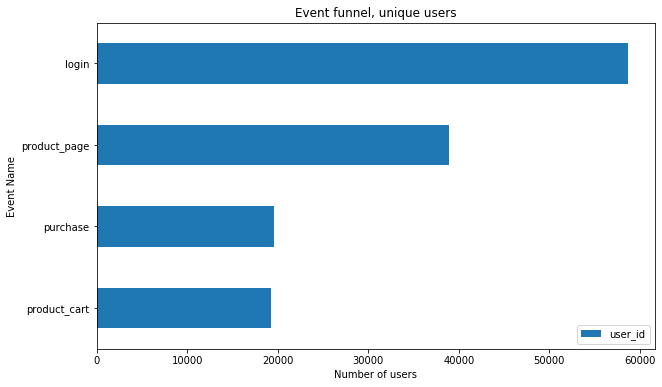

In [12]:
final_ab_events.groupby('event_name').agg({'user_id':'nunique'}).sort_values(by='user_id').plot(kind='barh', figsize=(10,6))
plt.title('Event funnel, unique users')
plt.ylabel('Event Name')
plt.xlabel('Number of users')
plt.show()

In [13]:
#data = dict(
#    number=[189552, 125563, 62462, 62740], 
#    stage=['login', 'product_page', 'product_cart', 'purchases'])
#fig = px.funnel(data, x='number', y='stage', title='Stage conversions funnel')
#fig.show()

---

<div class="alert alert-block alert-danger">
    

### Reviewer's comment

It's a nice funnel (but better to check your code if it is work on the jupyter platform - here it doesn't work).
    
How to do better funnel:
- avoid hard code values `number=[189552, 125563, 62462, 62740]` - to take values from DataFrame (e.g. `final_ab_events.groupby('event_name').agg({'user_id':'count'})`)
- use in funnel unique users in addition to (or instead of) events number

</div>

---

---

<div class="alert alert-block alert-success">
    

### Reviewer's comment V2

Thank you for corrections

</div>

---

The funnel showed that the final step 'purchases' has larger number of users than the previous step 'product cart'. This is probably due to the 'Buy Now' button which can offer users to buy products skipping some steps and go directly to the purchase stage. 

---

<div class="alert alert-block alert-success">
    

### Reviewer's comment

Good assumption 

</div>

---

### Is the number of events per user distributed equally among the samples?

In [14]:
final_ab_partcs.ab_test.unique()

array(['recommender_system_test', 'interface_eu_test'], dtype=object)

In [15]:
final_ab_partcs.query('ab_test=="recommender_system_test"').agg({'user_id':'nunique'})

user_id    6701
dtype: int64

The dataset actually has data on two tests, only one is needed (recommender_system_test). It reached the expected number of participants. 

In [16]:
# Leaving only recommender_system_test ab_test
final_ab_partcs = final_ab_partcs.query('ab_test=="recommender_system_test"')

# Merging datasets with events and participants for recommender_system_test
partcs_events = final_ab_partcs.merge(final_ab_events, on='user_id', how='right')
partcs_events.dropna(inplace=True)

partcs_events.groupby(['event_name', 'group']).agg({'user_id':'nunique'})

user_id
event_name   group         
login        A         2747
             B          928
product_cart A          824
             B          255
product_page A         1780
             B          523
purchase     A          872
             B          256

The table above shows the actual funnel for recommender_system_test for A/B groups of users. Each step has unique number of users who were identified for each step but not necesserily went through all steps.

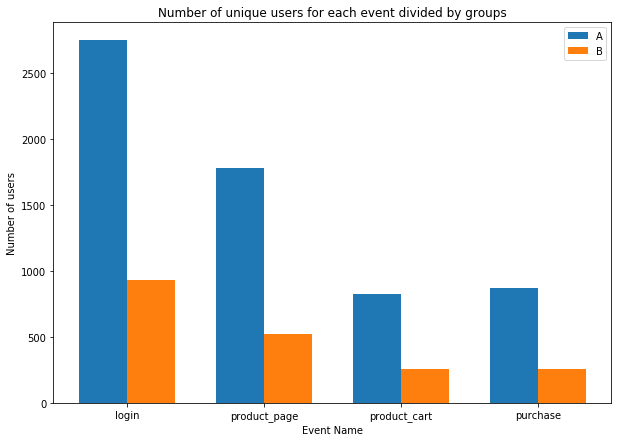

In [17]:
labels = ['login', 'product_page', 'product_cart', 'purchase']
groupA = [2747, 1780, 824, 872]
groupB = [928, 523, 255, 256]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 7))
rects1 = ax.bar(x - width/2, groupA, width, label='A')
rects2 = ax.bar(x + width/2, groupB, width, label='B')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Event Name')
ax.set_ylabel('Number of users')
ax.set_title('Number of unique users for each event divided by groups')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

Group B clearly has much less users. The split is ~34/66, which is different from the traditional 50/50 group split. 

In [18]:
number_events_per_user = partcs_events.pivot_table(index='user_id', columns='event_name', values='event_dt', aggfunc='count')\
                         .fillna(0).reset_index(drop=False)
number_events_per_user['total_events'] = number_events_per_user['login'] + number_events_per_user['product_cart'] + \
                                        number_events_per_user['product_page'] + number_events_per_user['purchase']

groups = partcs_events.drop(columns={'ab_test', 'event_dt', 'event_name', 'details'})
number_events_per_user = number_events_per_user.merge(groups, on='user_id', how='inner').drop_duplicates().reset_index(drop=True)
number_events_per_user

,user_id,login,product_cart,product_page,purchase,total_events,group
0,001064FEAAB631A1,3.0,0.0,3.0,0.0,6.0,B
1,0010A1C096941592,4.0,0.0,4.0,4.0,12.0,A
2,00341D8401F0F665,2.0,0.0,0.0,0.0,2.0,A
3,003DF44D7589BBD4,5.0,5.0,5.0,0.0,15.0,A
4,00505E15A9D81546,5.0,0.0,0.0,0.0,5.0,A
...,...,...,...,...,...,...,...
3670,FF5B24BCE4387F86,3.0,0.0,3.0,3.0,9.0,A
3671,FF825C1D791989B5,4.0,4.0,0.0,0.0,8.0,A
3672,FF8CF7057415EB29,2.0,0.0,2.0,0.0,4.0,B
3673,FFAE9489C76F352B,3.0,0.0,3.0,0.0,6.0,A


In [19]:
number_events_per_user.groupby('group').agg({'login':'mean', 'product_page':'mean', 'product_cart':'mean', 'purchase':'mean', 'total_events':'mean'})

,login,product_page,product_cart,purchase,total_events
group,,,,,
A,3.118311,2.011285,0.931198,0.966509,7.027303
B,2.827586,1.514009,0.742457,0.728448,5.812500


The table above shows the mean events number per user in each test group. It seems like the numbers do not differ much. If the number of users for each event was distributed equally among the groups, one could conclude that users from both groups go through all stages roughly equal amount of times. But as the previous graph showed group B has much less users which means that users from group B visit the site more often, i.e. on average there are more events per user in group B that group A. 

#### Marketing events intersection:

In [20]:
ab_events['month'] = ab_events['start_dt'].dt.month
ab_events.groupby(['month', 'name', 'regions']).agg({'start_dt':'max', 'finish_dt':'max'})

start_dt  \
month name                             regions                               
1     Chinese New Year Promo           APAC                     2020-01-25   
2     St. Valentine's Day Giveaway     EU, CIS, APAC, N.America 2020-02-14   
3     International Women's Day Promo  EU, CIS, APAC            2020-03-08   
      St. Patric's Day Promo           EU, N.America            2020-03-17   
4     Easter Promo                     EU, CIS, APAC, N.America 2020-04-12   
5     Labor day (May 1st) Ads Campaign EU, CIS, APAC            2020-05-01   
      Victory Day CIS (May 9th) Event  CIS                      2020-05-09   
6     Dragon Boat Festival Giveaway    APAC                     2020-06-25   
7     4th of July Promo                N.America                2020-07-04   
10    Chinese Moon Festival            APAC                     2020-10-01   
11    Black Friday Ads Campaign        EU, CIS, APAC, N.America 2020-11-26   
      Single's Day Gift Promo          APAC                     2020-11-11   
12    CIS New Year Gift Lottery        CIS                      2020-12-30   
      Christmas&New Year Promo         EU, N.America            2020-12-25   

                                                                 finish_dt  
month name                             regions                              
1     Chinese New Year Promo           APAC                     2020-02-07  
2     St. Valentine's Day Giveaway     EU, CIS, APAC, N.America 2020-02-16  
3     International Women's Day Promo  EU, CIS, APAC            2020-03-10  
      St. Patric's Day Promo           EU, N.America            2020-03-19  
4     Easter Promo                     EU, CIS, APAC, N.America 2020-04-19  
5     Labor day (May 1st) Ads Campaign EU, CIS, APAC            2020-05-03  
      Victory Day CIS (May 9th) Event  CIS                      2020-05-11  
6     Dragon Boat Festival Giveaway    APAC                     2020-07-01  
7     4th of July Promo                N.America                2020-07-11  
10    Chinese Moon Festival            APAC                     2020-10-07  
11    Black Friday Ads Campaign        EU, CIS, APAC, N.America 2020-12-01  
      Single's Day Gift Promo          APAC                     2020-11-12  
12    CIS New Year Gift Lottery        CIS                      2021-01-07  
      Christmas&New Year Promo         EU, N.America            2021-01-03

Only a few marketing events associated with New Year actually intersect in dates. These are CIS New Year Gift Lottery and Christmas&New Year Promo. This means that if users who participated in the test come from both CIS or EU, they need to be divided by regions and AB test results should be analyzed separately.

#### Analysis for EU users only:

In [21]:
# table with full user data including country and device type
full_data = partcs_events.merge(final_ab_new_users, on='user_id', how='right').dropna()
full_data

,user_id,group,ab_test,event_dt,event_name,details,first_date,region,device
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,99.989998,2020-12-07,EU,PC
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-25 00:04:56,purchase,4.990000,2020-12-07,EU,PC
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,0.000000,2020-12-07,EU,PC
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-25 00:04:57,product_cart,0.000000,2020-12-07,EU,PC
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,0.000000,2020-12-07,EU,PC
...,...,...,...,...,...,...,...,...,...
24693,6715343AFBA285AE,B,recommender_system_test,2020-12-07 10:12:15,login,0.000000,2020-12-07,CIS,Android
24694,6715343AFBA285AE,B,recommender_system_test,2020-12-08 22:51:16,login,0.000000,2020-12-07,CIS,Android
24695,6715343AFBA285AE,B,recommender_system_test,2020-12-09 02:28:03,login,0.000000,2020-12-07,CIS,Android
24696,6715343AFBA285AE,B,recommender_system_test,2020-12-10 22:55:14,login,0.000000,2020-12-07,CIS,Android


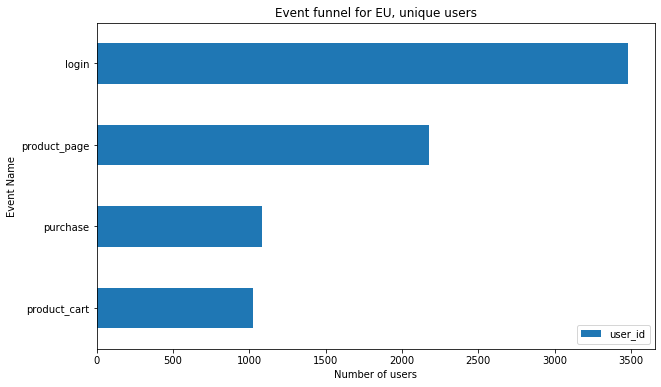

In [22]:
full_data.query('region=="EU"').groupby('event_name').agg({'user_id':'nunique'}).sort_values(by='user_id').plot(kind='barh', figsize=(10,6))
plt.title('Event funnel for EU, unique users')
plt.ylabel('Event Name')
plt.xlabel('Number of users')
plt.show()

As with the general funnel, event funnel for EU users only also has purchase step before the preceding product_cart step.

In [23]:
number_events_per_userEU = full_data.query('region=="EU"').pivot_table(index='user_id', columns='event_name', values='event_dt', aggfunc='count')\
                         .fillna(0).reset_index(drop=False)
number_events_per_userEU['total_events'] = number_events_per_userEU['login'] + number_events_per_userEU['product_cart'] + \
                                        number_events_per_userEU['product_page'] + number_events_per_userEU['purchase']

#groups = partcs_events.drop(columns={'ab_test', 'event_dt', 'event_name', 'details'})
number_events_per_userEU = number_events_per_userEU.merge(groups, on='user_id', how='inner').drop_duplicates().reset_index(drop=True)
number_events_per_userEU

,user_id,login,product_cart,product_page,purchase,total_events,group
0,001064FEAAB631A1,3.0,0.0,3.0,0.0,6.0,B
1,0010A1C096941592,4.0,0.0,4.0,4.0,12.0,A
2,00341D8401F0F665,2.0,0.0,0.0,0.0,2.0,A
3,003DF44D7589BBD4,5.0,5.0,5.0,0.0,15.0,A
4,00505E15A9D81546,5.0,0.0,0.0,0.0,5.0,A
...,...,...,...,...,...,...,...
3476,FF5B24BCE4387F86,3.0,0.0,3.0,3.0,9.0,A
3477,FF825C1D791989B5,4.0,4.0,0.0,0.0,8.0,A
3478,FF8CF7057415EB29,2.0,0.0,2.0,0.0,4.0,B
3479,FFAE9489C76F352B,3.0,0.0,3.0,0.0,6.0,A


In [24]:
number_events_per_userEU.groupby('group').agg({'login':'mean', 'product_page':'mean', 'product_cart':'mean', 'purchase':'mean', 'total_events':'mean'})

,login,product_page,product_cart,purchase,total_events
group,,,,,
A,3.119816,2.007296,0.930108,0.973886,7.031106
B,2.817560,1.513113,0.744584,0.752566,5.827822


The analysis shows that the number of events per EU user is same and actually the majority of test participants are from EU.

---

<div class="alert alert-block alert-success">
    

### Reviewer's comment

Good conclusion.
    
Difference in group sizes is not good  but sometimes we ignore it arranging AB test

</div>

---

---

<div class="alert alert-block alert-danger">
    

### Reviewer's comment

You've done deep and detailed funnel analysis but could you check one more time (in this section and below):
- analyse only EU users
- marketing events intersection

</div>

---

The further analysis will only consider EU users because of two reasons:
1. The EU users are the majority of users.
2. In order to provide correct A/B test analysis the groups must have equal conditions except for only one variable. It is not the case according to the datasets (full_data and ab_events). CIS users and EU users, who were chosen for the test, actually participated in different marketing events, which are overlapping. EU users were offered Christmas&New Year promo, whereas CIS users were offered CIS New Year gift lottery. Due to that fact it is not correct to include both regions in one test.

---

<div class="alert alert-block alert-danger">
    

### Reviewer's comment V2

- You did a good job analysing marketing events intesection - but what was outcome after this? What to do with these users? 
- Thank you for checking EU user, but you should go deeper and perform further steps using EU users or explain why do use not only EU region 

</div>

---

---

<div class="alert alert-block alert-success">
    

### Reviewer's comment V3

Thank you for performing analysis of EU users and marketing events intersections

</div>

---

### Are there users who are present in both samples?

In [25]:
# The participants_events dataset is divided into 2 datasets with only A or B groups
groupA = partcs_events.query('group=="A"')
groupB = partcs_events.query('group=="B"')
# Groups are merged if they have common user_ids
AB = groupA.merge(groupB, on='user_id', how='inner')

In [26]:
AB

,user_id,group_x,ab_test_x,event_dt_x,event_name_x,details_x,group_y,ab_test_y,event_dt_y,event_name_y,details_y


There are no users who are present in both groups.

### How is the number of events distributed among days? The analysis only included EU users

In [27]:
full_dataEU = full_data.query('region=="EU"')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



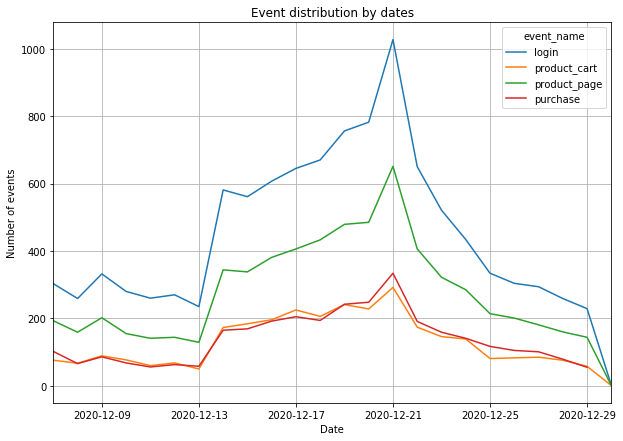

In [28]:
full_dataEU['date'] = full_dataEU['event_dt'].dt.date
events_by_dates = full_dataEU.pivot_table(index='date', columns='event_name', values='details', aggfunc='count').reset_index(drop=False)

events_by_dates.plot(x='date', figsize=(10, 7), grid=True)
plt.xlabel('Date')
plt.ylabel('Number of events')
plt.title('Event distribution by dates')
plt.show()

The number of events was decreasing till 2020-12-13 and then it spiked and continued to increase till 2020-12-21, which is due to the fact that no new users were accepted for the test. Right after Christmas Eve the number of events gradually decreased to 0. 

### Are there any peculiarities in the data that you have to take into account before starting the A/B test?

In [29]:
# Creating a table which shows when each user went through a particular step
users = full_dataEU.groupby(['event_name', 'user_id' ,'date']).agg({'details':'count'}).reset_index(drop=False)
login_users = users.query('event_name=="login"')
ppage_users = users.query('event_name=="product_page"')
pcart_users = users.query('event_name=="product_cart"')
purch_users = users.query('event_name=="purchase"')

In [30]:
test1 = login_users.merge(ppage_users, on=['user_id', 'date'], how='outer')
test1.rename(columns={'event_name_x':'login_event', 'details_x':'number_of_logins', 'event_name_y':'ppage_event', 'details_y':'number_of_ppage'}, inplace=True)
test2 = test1.merge(pcart_users, on=['user_id', 'date'], how='outer')

test3 = test2.merge(purch_users, on=['user_id', 'date'], how='outer')
test3.rename(columns={'event_name_x':'pcart_event', 'details_x':'number_of_pcart', 'event_name_y':'purch', 'details_y':'number_of_purch'}, inplace=True)
test3 = test3[['user_id', 'date', 'number_of_logins', 'number_of_ppage', 'number_of_pcart', 
       'number_of_purch']]

In [31]:
test3.fillna(0, inplace=True)

In [32]:
test3['stage_number'] = test3['number_of_logins'] + test3['number_of_ppage'] + test3['number_of_pcart'] + test3['number_of_purch']
# final table after all merges
test3

,user_id,date,number_of_logins,number_of_ppage,number_of_pcart,number_of_purch,stage_number
0,001064FEAAB631A1,2020-12-20,1.0,1.0,0.0,0.0,2.0
1,001064FEAAB631A1,2020-12-21,1.0,1.0,0.0,0.0,2.0
2,001064FEAAB631A1,2020-12-26,1.0,1.0,0.0,0.0,2.0
3,0010A1C096941592,2020-12-17,1.0,1.0,0.0,1.0,3.0
4,0010A1C096941592,2020-12-19,1.0,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...
10600,90192F1A66D5A0AE,2020-12-08,0.0,0.0,0.0,1.0,1.0
10601,A5392D494EB71414,2020-12-07,0.0,0.0,0.0,1.0,1.0
10602,C3C56A2DFF10BC79,2020-12-07,0.0,0.0,0.0,1.0,1.0
10603,C7CB2F1BA42F102B,2020-12-07,0.0,0.0,0.0,1.0,1.0


The table above shows each user's path for each day she/he was active. Stage number shows how many steps each user went through on a day. 

In [33]:
test3.stage_number.unique()

array([2., 3., 1., 4.])

There are users who skipped some steps as well as those who went through all of them. The data investigation showed that some users skipped all steps and went directly to the purchase stage. Some part of users skipped product cart stage, i.e. their funnel is login->product_page->purchase. Stage number 2 shows those who logged in and viewed the product page only. 

The investigation above requires to divide users into 2 groups for correct conversion analysis: product_page->product_cart->purchase and product_page->purchase as many users skip the cart stage. This fact if not taken into account could destort the results. 

In [34]:
ppage_pcart = test3.query('number_of_ppage==1 and number_of_pcart==1')
ppage_pcart = ppage_pcart.merge(full_dataEU[['user_id', 'group']], on='user_id', how='left')

In [35]:
print('Number of unique users from both groups who went through product cart after product page')
ppage_pcart.groupby('group').agg({'user_id':'nunique'})

Number of unique users from both groups who went through product cart after product page


,user_id
group,
A,510
B,136


In [36]:
print('Number of unique users from both groups who went through product cart and made a purchase')
ppage_pcart.query('number_of_purch!=0').groupby('group').agg({'user_id':'nunique'})

Number of unique users from both groups who went through product cart and made a purchase


,user_id
group,
A,170
B,46


In [37]:
ppage_Npcart = test3.query('number_of_ppage==1 and number_of_pcart==0')
ppage_Npcart = ppage_Npcart.merge(full_dataEU[['user_id', 'group']], on='user_id', how='left')

In [38]:
print('Number of unique users from both groups who did not go through product cart after product page')
ppage_Npcart.groupby('group').agg({'user_id':'nunique'})

Number of unique users from both groups who did not go through product cart after product page


,user_id
group,
A,1175
B,357


In [39]:
print('Number of unique users from both groups who did not go through product cart after product page and made a purchase')
ppage_Npcart.query('number_of_purch!=0').groupby('group').agg({'user_id':'nunique'})

Number of unique users from both groups who did not go through product cart after product page and made a purchase


,user_id
group,
A,409
B,109


In [40]:
# number of those who skipped all funnel stages and made a purchase
print('Number of people who skipped all funnel steps and made a purchase (both groups)')
test3.query('number_of_ppage==0 and number_of_pcart==0 and number_of_purch==1').user_id.nunique()

Number of people who skipped all funnel steps and made a purchase (both groups)


235

The EDA showed that there are peculiarities in the dataset that should be taken into account before hypothesis testing. i.e. There are two groups of users to consider, the statistical test for these funnel groups will be carried out separately. 

Funnel 1: product_page->product_cart->purchase

Funnel 2: product_page->purchase

The test will ignore those who skipped all funnel stages and went directly to the purchase stage. 

### Step 2. Conclusion

According to the funnel the final step 'purchases' has larger number of users than the previous step 'product cart'. This is probably due to the 'Buy Now' button or other options which can offer users to buy products skipping some steps and go directly to the purchase stage. The number of events were analyzed for AB groups. Group B has much less users but the average amount of events per user is comparable to that of group A, which means that users from group B visit the site more often. There are no users who are present in both groups. The number of events ditribution among days showed that it was decreasing till 2020-12-13 and then it spiked and continued to increase till 2020-12-21, which is due to the fact that no new users were accepted for the test. Right after Christmas Eve the number of events gradually decreased to 0.

There were users who skipped some steps as well as those who went through all of them. The data investigation showed that some users skipped all steps and went directly to the purchase stage. Some part of users skipped product cart stage, i.e. their funnel is login->product_page->purchase. There are peculiarities in the dataset that should be taken into account before hypothesis testing. i.e. There are two groups of users to consider, the statistical test for these funnel groups will be carried out separately.

---

<div class="alert alert-block alert-success">
    

### Reviewer's comment

Great peculiarities  analysis
    
Interesting decision to separate funnel types  

</div>

---

## Step 3. A/B test (EU users only)

In [41]:
revenue = full_dataEU.groupby(['date', 'group']).agg({'details':'sum'}).reset_index(drop=False)

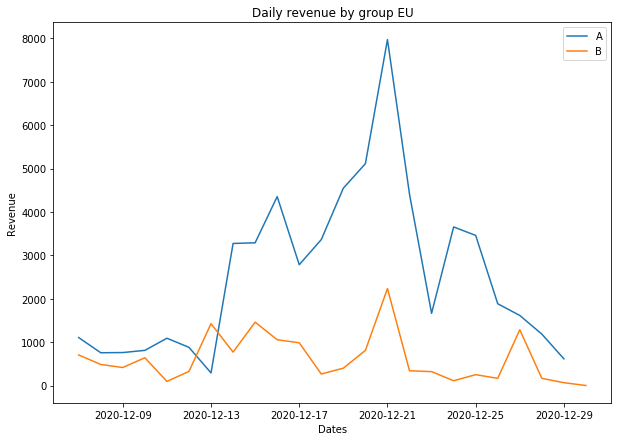

In [42]:
revenueA = revenue.query('group=="A"')
revenueB = revenue.query('group=="B"')

plt.figure(figsize=(10,7))
plt.plot(revenueA['date'], revenueA['details'], label='A')
plt.plot(revenueB['date'], revenueB['details'], label='B')
plt.legend()
plt.title('Daily revenue by group EU')
plt.xlabel('Dates')
plt.ylabel('Revenue')
plt.show()

The graph above shows the daily amount of revenue for each group. As we can see it correlates with traffic number, i.e. 2020-12-21 had the highers traffic which led to highest revenue. Interestingly, there are dates when the revenue spiked for one group and dropped for another. For example, on 2020-12-13 and 2020-12-27. 

---

<div class="alert alert-block alert-warning">
    

### Reviewer's comment

It's interesting plot, but it's not cumulative (in title). If you make it cumulative - it would be also intersting analysis

</div>

---

In [43]:
conversionA = full_dataEU.query('group=="A"').pivot_table(index='date', columns='event_name', values='user_id', aggfunc='count').reset_index(drop=False)
conversionB = full_dataEU.query('group=="B"').pivot_table(index='date', columns='event_name', values='user_id', aggfunc='count').reset_index(drop=False)

conversionA['conversion login->product_page'] = conversionA['product_page'] / conversionA['login']
conversionB['conversion login->product_page'] = conversionB['product_page'] / conversionB['login']
conversionA['conversion product_page->product_cart'] = conversionA['product_cart'] / conversionA['product_page']
conversionB['conversion product_page->product_cart'] = conversionB['product_cart'] / conversionB['product_page']
conversionA['conversion product_page->purchase'] = conversionA['purchase'] / conversionA['product_page']
conversionB['conversion product_page->purchase'] = conversionB['purchase'] / conversionB['product_page']

def conv_print(conv):
    
    plt.figure(figsize=(10,7))
    plt.plot(conversionA['date'], conversionA[conv], label='A')
    plt.plot(conversionB['date'], conversionB[conv], label='B')
    plt.legend()
    plt.title('Daily conversion rates by group')
    plt.xlabel('Dates')
    plt.ylabel(conv)
    plt.show()

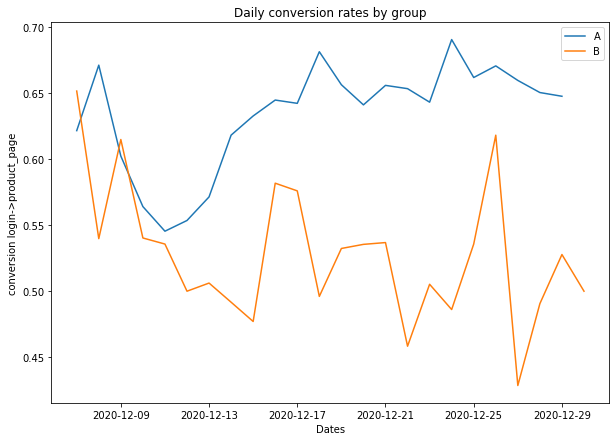

In [44]:
conv_print('conversion login->product_page')

The conversion rate of login->purchase page for group B dramatically increased and decreased from day to day, whereas the graph for group A is relatively stable with only occasional minor spikes. 

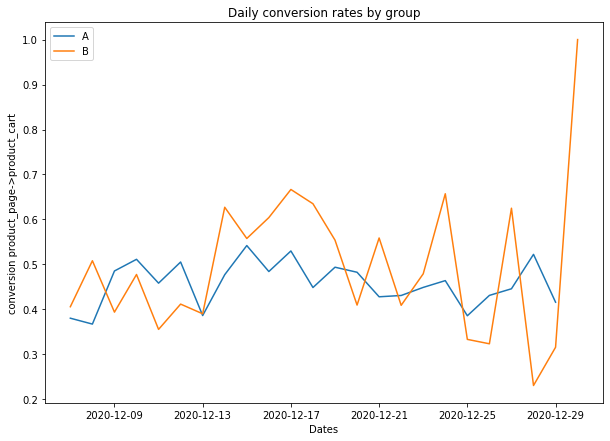

In [45]:
conv_print('conversion product_page->product_cart')

The group B graph shows better results most of the days with the conversion rate being 0.4-0.6. 

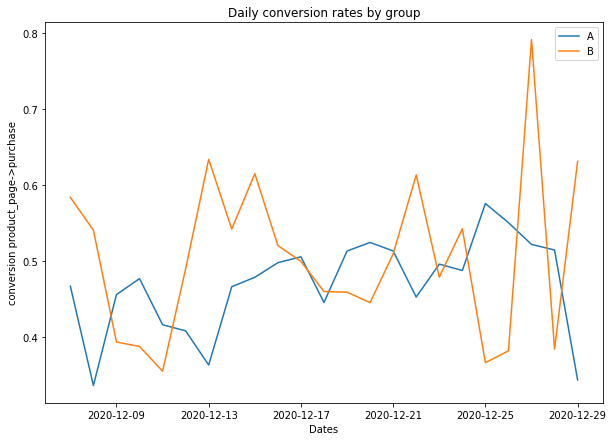

In [46]:
conv_print('conversion product_page->purchase')

The graph for this conversion rate again shows that group B users had better conversion rate from day to day in general, with the range being approximately 0.4-0.6 for group A and 0.4-0.7 for group B. 

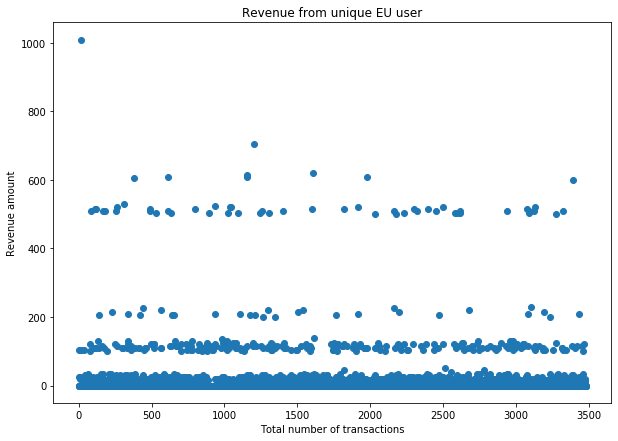

In [47]:
revenue_by_user = full_dataEU.pivot_table(index='user_id', values='details', aggfunc='sum').reset_index()

x_values = pd.Series(range(0,len(revenue_by_user['user_id'])))

plt.figure(figsize=(10,7))
plt.scatter(x=x_values, y=revenue_by_user['details'])
plt.title('Revenue from unique EU user')
plt.ylabel('Revenue amount')
plt.xlabel('Total number of transactions')
plt.show()

The majority of users did not spend more than $100 on all of the transactions they made. 

In [48]:
print(np.percentile(revenue_by_user['details'], [95, 99]))

[114.95999908 509.97000122]


Only 5% of users spent more than $115.

Only 1% of users spent more than $510, taking into account all their transactions (this is not revenue per one transaction).

In [49]:
def group_graph(labels, groupA, groupB, n):

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 7))
    rects1 = ax.bar(x - width/2, groupA, width, label='A')
    rects2 = ax.bar(x + width/2, groupB, width, label='B')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    if n==1:
        ax.set_xlabel('Country Name')
        ax.set_ylabel('Number of users')
        ax.set_title('Number of unique users for each country divided by groups')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()
    if n==2:
        ax.set_xlabel('Device Name')
        ax.set_ylabel('Number of users')
        ax.set_title('Number of unique users for each device divided by groups')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()        

In [50]:
full_data.groupby(['region', 'group']).agg({'user_id':'nunique'})

user_id
region    group         
APAC      A           28
          B           17
CIS       A           19
          B           11
EU        A         2604
          B          877
N.America A           96
          B           23

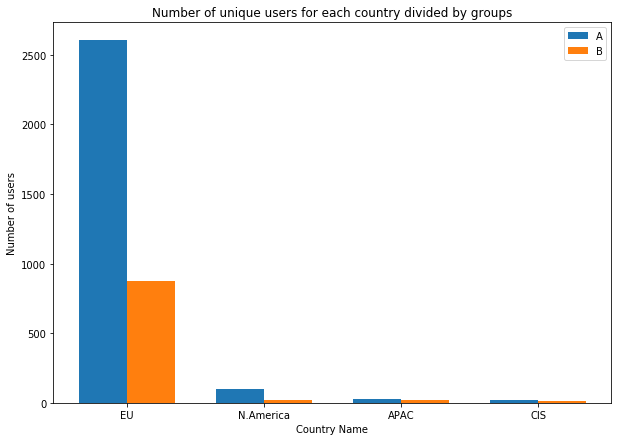

In [51]:
group_graph(['EU', 'N.America', 'APAC', 'CIS'], [2604, 96, 28, 19], [877, 23, 17, 11], 1)

The users are distributed equally in both groups for each country. 

In [52]:
full_data.groupby(['device', 'group']).agg({'user_id':'nunique'})

user_id
device  group         
Android A         1197
        B          428
Mac     A          270
        B           76
PC      A          726
        B          227
iPhone  A          554
        B          197

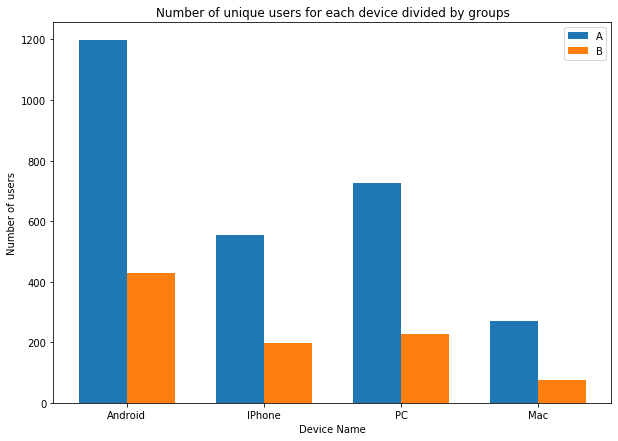

In [53]:
group_graph(['Android', 'IPhone', 'PC', 'Mac'], [1197, 554, 726, 270], [428, 197, 227, 76], 2)

The users are distributed equally in both groups for each device type. 

Group B showed better results for some conversion stages, more specifically product_page->product_cart and product_page->purchase. The daily conversion rates for product_cart->purchase were not graphed since the data is not divided into two funnel groups. In general the graphs are a little distorted as the data was not divided into different funnel types. Due to that one cannot draw conclusions based only on graphs and they show only rough representation of true outcomes. The statistical test results will show the correct results.

---

<div class="alert alert-block alert-warning">
    

### Reviewer's comment

You made deep analysis of daily values per group! It's interesting (but not obligatory) to add cumulative values
</div>

---

### Use a z-test to check the statistical difference between the proportions.

#### Hypotheses

1. H0 - there is no difference in conversion rates for product_cart->purchase between groups A and B (specifically Funnel1). H1 - there is difference in conversion rates for product_cart->purchase between groups A and B.
2. H0 - there is no difference in conversion rates for product_page->purchase between groups A and B (specifically Funnel2). H1 - there is difference in conversion rates for product_page->purchase between groups A and B.

### Hypothesis testing: Z-test

In [54]:
full_dataEU.groupby(['event_name', 'group']).agg({'user_id':'nunique'})

user_id
event_name   group         
login        A         2604
             B          877
product_cart A          782
             B          244
product_page A         1685
             B          493
purchase     A          833
             B          249

In [55]:
def z_test(stage1, stage2):
    
    alpha = .05
    product_page = stage2
    logged_users = stage1

    p1 = product_page[0]/logged_users[0]
    p2 = product_page[1]/logged_users[1]

    p_combined = (product_page[0] + product_page[1])/(logged_users[0] + logged_users[1])
    diff = p1 - p2
    z_value = diff / mth.sqrt(p_combined * (1-p_combined) * (1/logged_users[0] + 1/logged_users[1]))

    distr = st.norm(0,1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Rejecting the null hypothesis: there is a significant difference between the proportions")
    else:
        print("Failed to reject the null hypothesis: there is no reason to consider the proportions different")

---

<div class="alert alert-block alert-warning">
    

### Reviewer's comment

It's great that you tested all the funnel steps. But more often we test only result event conversion  (as below)
</div>

---

Testing two funnels:

Funnel 1: product_page->product_cart->purchase

Funnel 2: product_page->purchase

In [56]:
# those who went through product page AND product cart and converted to purchase 
print('Conversion product cart -> purchase')
z_test(np.array([510, 136]), np.array([170, 46]))
conv_rate = np.array([170, 46])/np.array([510, 136])
print('Conversion rate for group A:', round(conv_rate[0], 3))
print('Conversion rate for group B:', round(conv_rate[1], 3))

Conversion product cart -> purchase
p-value:  0.9142604535464176
Failed to reject the null hypothesis: there is no reason to consider the proportions different
Conversion rate for group A: 0.333
Conversion rate for group B: 0.338


In [57]:
# those who went through product page AND SKIPPED product cart and converted to purchase
print('Conversion product page -> purchase')
z_test(np.array([1175, 357]), np.array([409, 109]))
conv_rate = np.array([409, 109])/np.array([1175, 357])
print('Conversion rate for group A:', round(conv_rate[0], 3))
print('Conversion rate for group B:', round(conv_rate[1], 3))

Conversion product page -> purchase
p-value:  0.13471208875000285
Failed to reject the null hypothesis: there is no reason to consider the proportions different
Conversion rate for group A: 0.348
Conversion rate for group B: 0.305


The statistical test of the final funnel stages showed that there is no difference between proportions for both groups. The test should be stopped. 
Conversion product page -> purchase
p-value:  0.13471208875000285
Failed to reject the null hypothesis: there is no reason to consider the proportions different
Conversion rate for group A: 0.348
Conversion rate for group B: 0.305

Conversion product cart -> purchase
p-value:  0.9142604535464176
Failed to reject the null hypothesis: there is no reason to consider the proportions different
Conversion rate for group A: 0.333
Conversion rate for group B: 0.338

---

<div class="alert alert-block alert-success">
    

### Reviewer's comment

Great! Hypothesis tests are successfull

</div>

---

### Step 3. Conclusion

Daily conversion rate graphs were analysed at Step3. Group B showed better results for some conversion stages, more specifically product_page->product_cart and product_page->purchase. The daily conversion rates for product_cart->purchase were not graphed since the data is not divided into two funnel groups. In general the graphs are a little distorted as the data was not divided into different funnel types. Due to that one cannot draw conclusions based only on graphs and they show only rough representation of true outcomes. 

The statistical significance of difference between groups' conversion rates was checked. Final funnel stages did not show any statistical difference. This means that the expected results were not achieved and the company should should stop the test since the expected number of participants was reached and the test did not show desirable results. 

## Conclusion

The EDA was divided into following steps: events funnel, number of events per user, events distribution among days and search for peculiarities in the data. The funnel analyzed in this project showed the number of times one user went through one stage, i.e. one user could have logged in multiple times and it is still represented in the funnel. Counting unique or nonunique user ids at each funnel stage does not change one important observation - according to the funnel the final step 'purchases' has larger number of users than the previous step 'product cart'. This is probably due to the 'Buy Now' button or other options which can offer users to buy products skipping some steps and go directly to the purchase stage. 

The number of events were analyzed for AB groups. Group B has much less users but the average amount of events per user is comparable to that of group A, which means that users from group B visit the site more often. There are no users who are present in both groups. The number of events ditribution among days showed that it was decreasing till 2020-12-13 and then it spiked and continued to increase till 2020-12-21, which is due to the fact that no new users were accepted for the test. Right after Christmas Eve the number of events gradually decreased to 0.

There were users who skipped some steps as well as those who went through all of them. The data investigation showed that some users skipped all steps and went directly to the purchase stage. Some part of users skipped product cart stage. The data actually has two funnel stage types: login->product_page->purchase and login->product_page->product_cart->purchase. These peculiarities in the dataset were taken into account before hypothesis testing

Hypotheses testing part includes 4 hypotheses which correspond to each funnel stage. Daily conversion rate graphs were analyzed for two groups. Group B showed better results for some conversion stages, more specifically product_page->product_cart and product_page->purchase. In general the graphs are a little distorted as the data was not divided into different funnel types. 

The statistical significance of difference between groups' conversion rates was checked. According to the test group A showed better results for these stages of funnel: login -> product page and product page -> purchase. Other funnel stages did not show any statistical difference. This means that the expected results were not achieved and the company should should stop the test since the expected number of participants was reached and the test did not show desirable results.

---

<div class="alert alert-block alert-success">
    

### Reviewer's comment

Great and business oriented conclusions. Thank you for recommendations for AB test (could you highlight it)

</div>

---

---


<div class="alert alert-block alert-warning">
    

### General reviewer's comment

You did such a good job!
    
You perform correct computations, build good looking plots, write correct conclusions.
    
I've found some issues in your project (see my comments above). 
    
    
They'll be easy to fix.
    
</div>

---


---


<div class="alert alert-block alert-warning">
    

### General reviewer's comment V2

Thank you for correcting your project!
    
I'm really glad to see that the part regarding EU users and marketing events is much improved! However, this part needs a bit more work. Could you take a second glance at it? 
    
See my V2 comments   
    
</div>

---


---


<div class="alert alert-block alert-success">
    

### General reviewer's comment V3

You've done such a great job improving your project! 
    
I'm glad to say that your project has been accepted.
    
Good luck! 
    
</div>

---
